## **Plugged versus Active Oil Wells**

This notebook was created to produce a chart of plugged versus active oil wells and rename the 'P' and 'A' status outputs.
***

In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
df = pd.read_csv('data/Oil_Wells.csv')

In [4]:
gdf = gpd.GeoDataFrame(df,
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [5]:
gdf.head(10)

,X,Y,OBJECTID,DistrictNu,APINumber,BLMWell,DryHole,WellStatus,OperatorNa,CountyName,...,Longitude,GISSourceC,LeaseName,Directiona,GISSymbol,LatestUpdate,DataSource,TOOLTIP,NLA_URL,geometry
0,-118.210349,33.765389,1,Southern,3703344,N,N,P,Tidelands Oil Production Co.,Los Angeles,...,-118.210337,opr,,N,OG,4/27/2018,http://www.conservation.ca.gov/dog/maps/Pages/...,Operator: Tidelands Oil Production Co.\nAPI No...,navigatela/reports/oil_wells.cfm?pk=03703344,POINT (-118.21034 33.76538)
1,-118.209901,33.765979,2,Southern,3703347,N,N,P,Mobil Oil Corporation,Los Angeles,...,-118.209889,opr,,N,OG,4/27/2018,http://www.conservation.ca.gov/dog/maps/Pages/...,Operator: Mobil Oil Corporation\nAPI No: 03703347,navigatela/reports/oil_wells.cfm?pk=03703347,POINT (-118.20989 33.76597)
2,-118.219647,33.764817,3,Southern,3703370,N,N,P,Mobil Oil Corporation,Los Angeles,...,-118.219635,hud,,N,OG,4/27/2018,http://www.conservation.ca.gov/dog/maps/Pages/...,Operator: Mobil Oil Corporation\nAPI No: 03703370,navigatela/reports/oil_wells.cfm?pk=03703370,POINT (-118.21963 33.76481)
3,-118.217408,33.768137,4,Southern,3703442,N,N,P,Mobil Oil Corporation,Los Angeles,...,-118.217396,opr,,N,OG,4/27/2018,http://www.conservation.ca.gov/dog/maps/Pages/...,Operator: Mobil Oil Corporation\nAPI No: 03703442,navigatela/reports/oil_wells.cfm?pk=03703442,POINT (-118.21740 33.76813)
4,-118.221296,33.772962,5,Southern,3703614,N,N,P,Mobil Oil Corporation,Los Angeles,...,-118.221284,opr,,N,OG,4/27/2018,http://www.conservation.ca.gov/dog/maps/Pages/...,Operator: Mobil Oil Corporation\nAPI No: 03703614,navigatela/reports/oil_wells.cfm?pk=03703614,POINT (-118.22128 33.77296)
5,-118.214824,33.780162,6,Southern,3703620,N,N,P,Tidelands Oil Production Co.,Los Angeles,...,-118.214812,opr,,N,OG,4/27/2018,http://www.conservation.ca.gov/dog/maps/Pages/...,Operator: Tidelands Oil Production Co.\nAPI No...,navigatela/reports/oil_wells.cfm?pk=03703620,POINT (-118.21481 33.78016)
6,-118.237856,33.769179,7,Southern,3704218,N,N,P,Union Pacific Resources Co.,Los Angeles,...,-118.237844,opr,,N,OG,4/27/2018,http://www.conservation.ca.gov/dog/maps/Pages/...,Operator: Union Pacific Resources Co.\nAPI No:...,navigatela/reports/oil_wells.cfm?pk=03704218,POINT (-118.23784 33.76917)
7,-118.236765,33.772779,8,Southern,3704227,N,N,P,Union Pacific Resources Co.,Los Angeles,...,-118.236753,opr,,N,"OG, WF",4/27/2018,http://www.conservation.ca.gov/dog/maps/Pages/...,Operator: Union Pacific Resources Co.\nAPI No:...,navigatela/reports/oil_wells.cfm?pk=03704227,POINT (-118.23675 33.77277)
8,-118.238819,33.772772,9,Southern,3704264,N,N,P,Tidelands Oil Production Co.,Los Angeles,...,-118.238807,opr,,N,WF,4/27/2018,http://www.conservation.ca.gov/dog/maps/Pages/...,Operator: Tidelands Oil Production Co.\nAPI No...,navigatela/reports/oil_wells.cfm?pk=03704264,POINT (-118.23881 33.77277)
9,-118.228730,33.766861,10,Southern,3704370,N,N,P,Tidelands Oil Production Co.,Los Angeles,...,-118.228718,opr,,N,OG,4/27/2018,http://www.conservation.ca.gov/dog/maps/Pages/...,Operator: Tidelands Oil Production Co.\nAPI No...,navigatela/reports/oil_wells.cfm?pk=03704370,POINT (-118.22872 33.76686)


/tmp/ipykernel_1442/513019963.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['WellStatus'] = filtered_df['WellStatus'].replace({'P': 'Plugged', 'A': 'Active'})


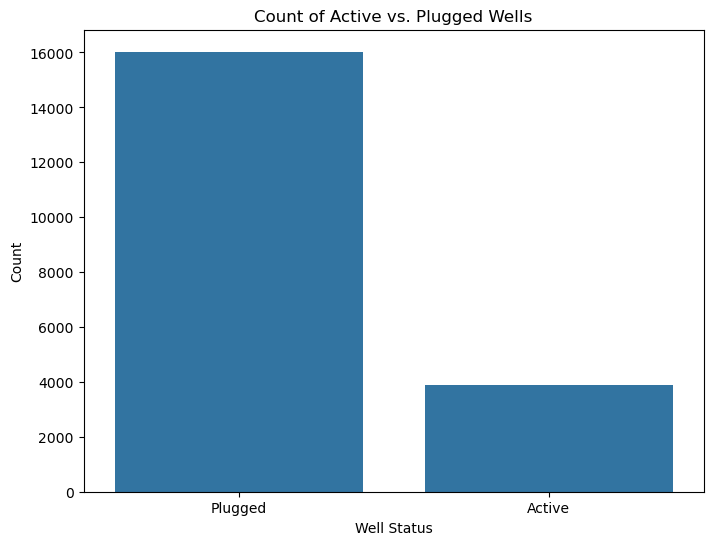

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe to include only 'Active' and 'Plugged' wells
filtered_df = df[df['WellStatus'].isin(['A', 'P'])]

# Replace 'P' and 'A' with 'Plugged' and 'Active'
filtered_df['WellStatus'] = filtered_df['WellStatus'].replace({'P': 'Plugged', 'A': 'Active'})


# Plot the chart
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_df, x='WellStatus')
plt.title('Count of Active vs. Plugged Wells')
plt.xlabel('Well Status')
plt.ylabel('Count')
plt.show()


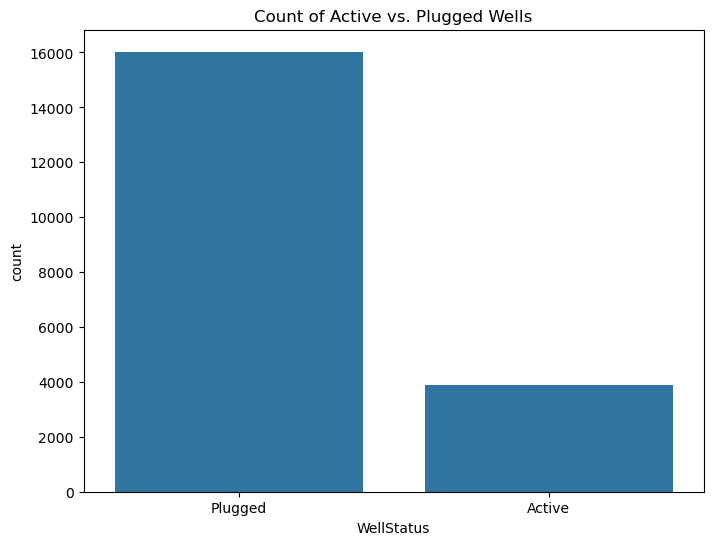

In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('data/Oil_Wells.csv')

# Filter the dataframe for only active ('A') and plugged ('P') wells
filtered_df = df[df['WellStatus'].isin(['A', 'P'])]

# Replace 'A' with 'Active' and 'P' with 'Plugged' in the 'WellStatus' column
filtered_df.loc[:, 'WellStatus'] = filtered_df['WellStatus'].replace({'P': 'Plugged', 'A': 'Active'})

# Plot the count of active vs. plugged wells
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_df, x='WellStatus')
plt.title('Count of Active vs. Plugged Wells')
plt.show()


In [8]:
plt.savefig('Count of Active vs. Plugged Wells.png')

<Figure size 640x480 with 0 Axes>

/tmp/ipykernel_1442/3764004286.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['WellStatus'] = filtered_df['WellStatus'].replace({'P': 'Plugged', 'A': 'Active'})


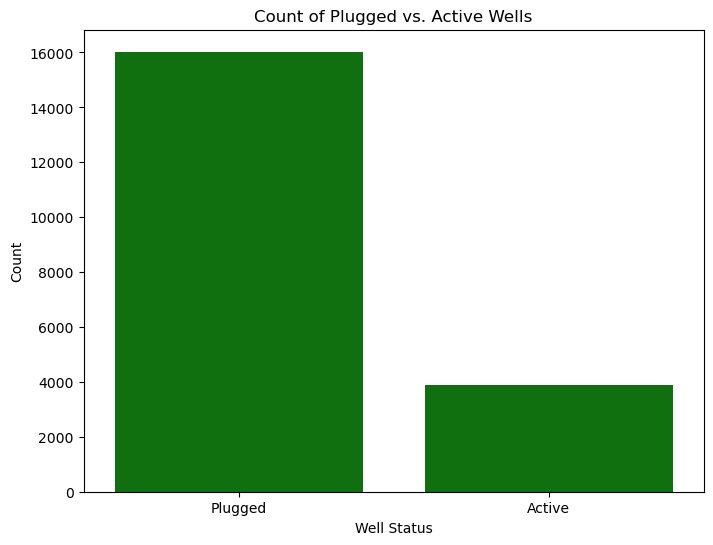

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe to include only 'Active' and 'Plugged' wells
filtered_df = df[df['WellStatus'].isin(['A', 'P'])]

# Replace 'P' and 'A' with 'Plugged' and 'Active'
filtered_df['WellStatus'] = filtered_df['WellStatus'].replace({'P': 'Plugged', 'A': 'Active'})

# Plot the chart
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_df, x='WellStatus', color='green')  # Set color to green
plt.title('Count of Plugged vs. Active Wells')
plt.xlabel('Well Status')
plt.ylabel('Count')
plt.show()
